In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [3]:
# Loading in the datasets
df_mortgage = pd.read_excel("Joel/mortgage_data.xlsx")
# df_mortgage.dtypes
df_mortgage.head()

,Client_ID,Date,PP_rate (%),Starting_notional,Client_rate (%),Loan_start_date,Loan_end_date,Remaining_maturity (M),Outstanding_notional
0,0,2016-01-31,0.005125,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,114,571372.828731
1,0,2016-02-29,0.006316,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,113,564372.241635
2,0,2016-03-31,0.005955,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,112,559002.242496
3,0,2016-04-30,0.005724,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,111,553199.871964
4,0,2016-05-31,0.008250,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,110,546573.739386


In [4]:
df_refinancing = pd.read_excel("Joel/refinancing_rate_data.xlsx")
# Renaming the unnamed column
df_refinancing.rename(columns= {"Unnamed: 0":"Date"}, inplace=True)
df_refinancing.head()

,Date,Refinancing rate
0,2016-01-31,0.02768
1,2016-02-29,0.02730
2,2016-03-31,0.02665
3,2016-04-30,0.02657
4,2016-05-31,0.02651


In [5]:
# Creating the Month and year column for the mortgage dataset
df_mortgage["Month"]= df_mortgage["Date"].dt.month
df_mortgage["Year"]= df_mortgage["Date"].dt.year
df_mortgage.head(4)

,Client_ID,Date,PP_rate (%),Starting_notional,Client_rate (%),Loan_start_date,Loan_end_date,Remaining_maturity (M),Outstanding_notional,Month,Year
0,0,2016-01-31,0.005125,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,114,571372.828731,1,2016
1,0,2016-02-29,0.006316,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,113,564372.241635,2,2016
2,0,2016-03-31,0.005955,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,112,559002.242496,3,2016
3,0,2016-04-30,0.005724,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,111,553199.871964,4,2016


In [28]:
# Segregating the data by years 2016,2017, 2018
df_2016 = df_mortgage[df_mortgage["Year"]==2016]
df_2017 = df_mortgage[df_mortgage["Year"]==2017]
df_2018 = df_mortgage[df_mortgage["Year"]==2018]
df_2016.head(4)

,Client_ID,Date,PP_rate (%),Starting_notional,Client_rate (%),Loan_start_date,Loan_end_date,Remaining_maturity (M),Outstanding_notional,Month,Year
0,0,2016-01-31,0.005125,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,114,571372.828731,1,2016
1,0,2016-02-29,0.006316,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,113,564372.241635,2,2016
2,0,2016-03-31,0.005955,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,112,559002.242496,3,2016
3,0,2016-04-30,0.005724,571372.828731,0.041953,2011-08-24 12:46:36,2025-08-23 12:46:36,111,553199.871964,4,2016


In [29]:
# Monthly aggregated prepayment rate for 2016
agg_2016 = df_2016.groupby("Month")["PP_rate (%)"].sum()
agg_2016_df = pd.DataFrame(agg_2016).reset_index()
agg_2016_df.head()

,Month,PP_rate (%)
0,1,0.093959
1,2,0.107838
2,3,0.101125
3,4,0.121158
4,5,0.181606


In [30]:
# Monthly aggregated prepayment rate for 2017
agg_2017 = df_2017.groupby("Month")["PP_rate (%)"].sum()
agg_2017_df = pd.DataFrame(agg_2017).reset_index()
agg_2017_df.head()

,Month,PP_rate (%)
0,1,0.114363
1,2,0.130028
2,3,0.127716
3,4,0.116513
4,5,0.199663


In [31]:
# Monthly aggregated prepayment rate for 2018
agg_2018 = df_2018.groupby("Month")["PP_rate (%)"].sum()
agg_2018_df = pd.DataFrame(agg_2018).reset_index()
agg_2018_df.head()

,Month,PP_rate (%)
0,1,0.114420
1,2,0.124568
2,3,0.127169
3,4,0.129479
4,5,0.186651


<IPython.core.display.Javascript object>


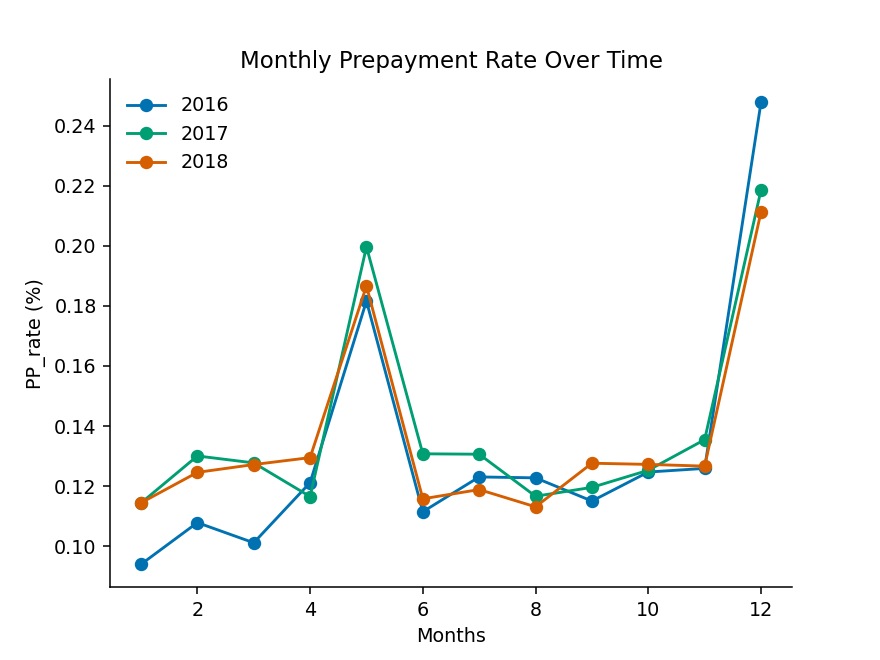

In [10]:
#  Plot showing the monthly prepayment rate over time
plt.style.use('seaborn-colorblind')
plt.figure()
plt.plot(agg_2016_df["Month"], agg_2016_df["PP_rate (%)"], '-o', label = '2016')
plt.plot(agg_2017_df["Month"], agg_2017_df["PP_rate (%)"], '-o', label = '2017')
plt.plot(agg_2018_df["Month"], agg_2018_df["PP_rate (%)"], '-o', label = '2018')

# removing top and right frames
plt.gca().spines.top.set_visible(False)
plt.gca().spines.right.set_visible(False)

# labelling the axes
plt.ylabel("PP_rate (%)")
plt.xlabel("Months")
plt.title("Monthly Prepayment Rate Over Time")

plt.legend(frameon=False)

For the monthly prepayment Rate of time, the graph clearly shows the presence of seasonality. The seasonality exists in the january, may and December. The seasonality may be as a result of certain factors. Eg: festivities, New year, Easter celebrations and Christmas celebrations.. these ocassions cause demand for certain items to go up. It may be attributed to other factors as well.
But generally, the prepayment trend has been upward moving. And 2016 had High rates as compared to 2017 which also had high rates than 2018.

In [11]:
# Creating the Month and year column for the refinancing dataset
df_refinancing["Month"]= df_refinancing["Date"].dt.month
df_refinancing["Year"]= df_refinancing["Date"].dt.year

In [12]:
# Segregating the data by years 2016,2017, 2018
df_2016_ref = df_refinancing[df_mortgage["Year"]==2016].reset_index()
df_2017_ref = df_refinancing[df_mortgage["Year"]==2017].reset_index()
df_2018_ref = df_refinancing[df_mortgage["Year"]==2018].reset_index()

<ipython-input-12-1313ad83052d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2016_ref = df_refinancing[df_mortgage["Year"]==2016].reset_index()
<ipython-input-12-1313ad83052d>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2017_ref = df_refinancing[df_mortgage["Year"]==2017].reset_index()
<ipython-input-12-1313ad83052d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018_ref = df_refinancing[df_mortgage["Year"]==2018].reset_index()


<IPython.core.display.Javascript object>


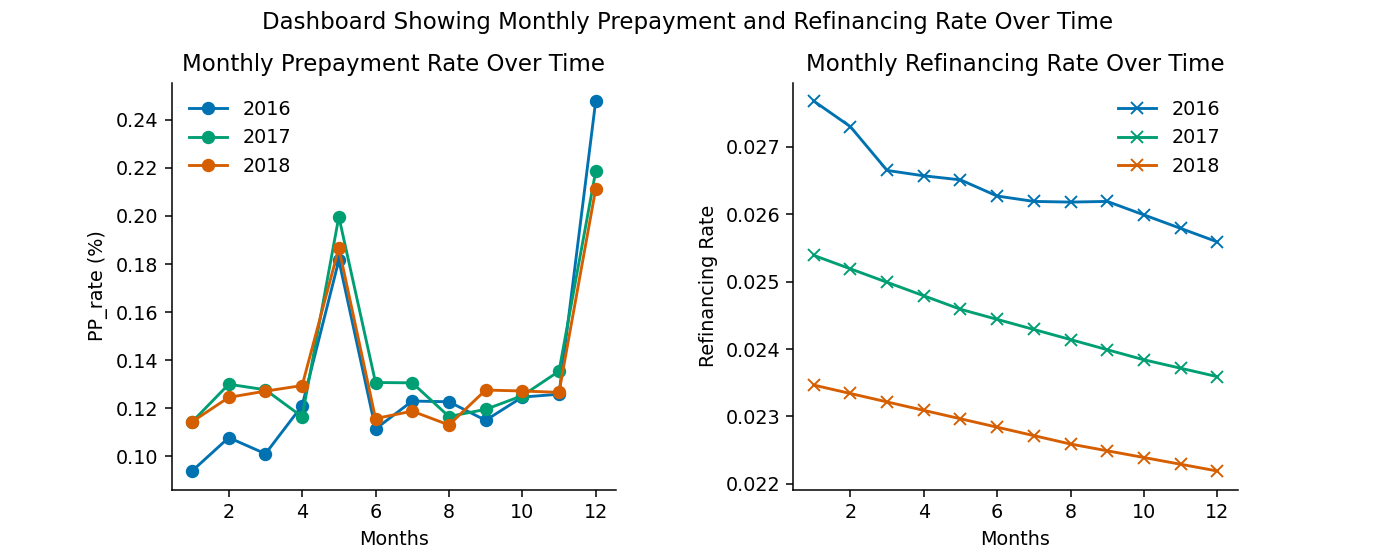

In [13]:
# Plotting the monthly refinancing rate next to the monthly prepayment rate. 
fig=plt.figure(figsize = (10,4))

ax = plt.subplot(1,2,1)
plt.subplots_adjust(wspace= 0.4)
ax.plot(agg_2016_df["Month"], agg_2016_df["PP_rate (%)"], '-o', label = '2016')
ax.plot(agg_2017_df["Month"], agg_2017_df["PP_rate (%)"], '-o', label = '2017')
ax.plot(agg_2018_df["Month"], agg_2018_df["PP_rate (%)"], '-o', label = '2018')

# labelling the axes
ax.set_xlabel('Months')
ax.set_ylabel("PP_rate (%)")
ax.set_title("Monthly Prepayment Rate Over Time")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon= False)

ax1 = plt.subplot(1,2,2)
ax1.plot(df_2016_ref["Month"], df_2016_ref["Refinancing rate"], '-x', label = '2016')
ax1.plot(df_2017_ref["Month"], df_2017_ref["Refinancing rate"], '-x', label = '2017')
ax1.plot(df_2018_ref["Month"], df_2018_ref["Refinancing rate"], '-x', label = '2018')

# labelling the axes
ax1.set_xlabel('Months')
ax1.set_ylabel("Refinancing Rate")
ax1.set_title("Monthly Refinancing Rate Over Time")

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend(frameon= False)

fig.suptitle("Dashboard Showing Monthly Prepayment and Refinancing Rate Over Time", fontsize=12)
fig.subplots_adjust(hspace=0.4, top=0.85)
# plt.savefig("ROT.png")

For the monthly prepayment Rate of time, the graph clearly shows the presence of seasonality. The seasonality exists in the january, may and December. The seasonality may be as a result of certain factors. Eg: festivities, New year, Easter celebrations and Christmas celebrations. these ocassions cause demand for certain items to go up. It may be attributed to other factors as well.
But generally, the prepayment trend has been upward moving. And 2016 had High rates as compared to 2017 which also had high rates than 2018.

For the refinancing rate over time, the trend has been a downward movement, no seasonality is shown is the data plotted. Like its shown in the Prepayment graph, the refinancing rate shows that 2016 had high rates followed by 2017 and then 2018. Its obvious that looking at the observed data, the future years will have even lower refinancing rates.

In [32]:
# Grouping the client rate column by month and client_id
df_new= df_mortgage.groupby(['Client_ID','Month'])['Client_rate (%)'].sum()
df_client_rate = pd.DataFrame(df_new).reset_index()
df_client_rate.head()

,Client_ID,Month,Client_rate (%)
0,0,1,0.125858
1,0,2,0.125858
2,0,3,0.125858
3,0,4,0.125858
4,0,5,0.125858


In [33]:
# Creating a new dataframe for the refinancing table
new_ref = pd.DataFrame(df_refinancing.groupby('Month')['Refinancing rate'].sum()).reset_index()
new_ref.head()

,Month,Refinancing rate
0,1,0.076535
1,2,0.075830
2,3,0.074855
3,4,0.074450
4,5,0.074065


In [16]:
# Merging the new client rate dataframe and the refinancing dataframe
rates_merge= pd.merge(df_client_rate,new_ref,on='Month', how = "inner")
rates_merge.head()

,Client_ID,Month,Client_rate (%),Refinancing rate
0,0,1,0.125858,0.076535
1,1,1,0.145823,0.076535
2,2,1,0.132332,0.076535
3,3,1,0.125386,0.076535
4,4,1,0.110839,0.076535


In [34]:
# Client rate - Refinancing
rates_merge['Client rate - refinancing rate']= rates_merge['Client_rate (%)']-rates_merge['Refinancing rate']
rates_merge.head(10)

,Client_ID,Month,Client_rate (%),Refinancing rate,Client rate - refinancing rate
0,0,1,0.125858,0.076535,0.049323
1,1,1,0.145823,0.076535,0.069288
2,2,1,0.132332,0.076535,0.055797
3,3,1,0.125386,0.076535,0.048851
4,4,1,0.110839,0.076535,0.034304
5,5,1,0.137507,0.076535,0.060972
6,6,1,0.112510,0.076535,0.035975
7,7,1,0.167013,0.076535,0.090478
8,8,1,0.175640,0.076535,0.099105
9,9,1,0.106013,0.076535,0.029478


In [18]:
# Importing relevant functions for linear regression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [35]:
PP_mortgage = df_mortgage.groupby("Month")["PP_rate (%)"].mean().reset_index()
PP_mortgage.head()

,Month,PP_rate (%)
0,1,0.004303
1,2,0.004832
2,3,0.004747
3,4,0.004895
4,5,0.007572


In [36]:
ref_df = df_refinancing.groupby("Month")["Refinancing rate"].sum().reset_index()
ref_df.head()

,Month,Refinancing rate
0,1,0.076535
1,2,0.075830
2,3,0.074855
3,4,0.074450
4,5,0.074065


In [21]:
func = pd.merge(ref_df, PP_mortgage, how= "inner")
func.head()

,Month,Refinancing rate,PP_rate (%)
0,1,0.076535,0.004303
1,2,0.075830,0.004832
2,3,0.074855,0.004747
3,4,0.074450,0.004895
4,5,0.074065,0.007572


In [22]:
X = func[["Refinancing rate"]] # Input features
y= func['PP_rate (%)'] # Target

In [23]:
# Splitting the model into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [24]:
# Feature normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Applying the ridge regression function
linridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

In [26]:
print('Mortgage dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Mortgage dataset
ridge regression linear model intercept: 0.004918636140169879
ridge regression linear model coeff:
[-0.00025069]
R-squared score (training): 0.404
R-squared score (test): -1.881
Number of non-zero features: 1


In [27]:
# plt.figure(figsize=(5,4))
# plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
# plt.plot(X_train, linridge.coef_ * X_train + linridge.intercept_, 'r-')
# plt.title('Ridge regression')
# plt.xlabel('Feature value (x)')
# plt.ylabel('Target value (y)')
# plt.show()